In [8]:
import sys
sys.path.append("/home/wanxinli/EHR-OT/")

import matplotlib.pyplot as plt
from mimic_common import *
import os
import pandas as pd
from statistics import median, stdev

In [9]:

def ratios_for_metrics(group_name, group_2, group_1, eval_metric, trans_metrics):
    """ 
    Compute ratios for the evaluation metrics (eval_metric)

    :param str eval_metric: evaluation metric, mae or rmse
    :param str trans_metric: transporting metric, OT, TCA or MMD
    """

    metric_improve_ratios = []
    score_dir = mimic_output_dir
    for trans_metric in trans_metrics:
        score_path = os.path.join(score_dir, f"exp4_{group_name}_{group_2}2{group_1}_{trans_metric}.csv")
        score_df = pd.read_csv(score_path, header=0, index_col=0)

        # compute improvements in terms of ratio
        metric_improve_ratios.append(compute_metric_ratio(score_df, eval_metric))

    return metric_improve_ratios


In [10]:
def print_median_std(ratios, trans_metrics, eval_metric):
    """ 
    Get median and standard deviation for the ratios of trans_metrics ('OT', 'TCA', 'MMD')
    """
    for i, trans_metric in enumerate(trans_metrics):
        print(f'{eval_metric} for {trans_metric}, Median: {median(ratios[i]):.1%}, Stdev: {stdev(ratios[i]):.1%}')

In [11]:
score_dir = "/home/wanxinli/EHR-OT/outputs/mimic/"

eval_metric = 'MAE'

# group_name = 'insurance'
# groups = ['Self_Pay', 'Private', 'Government', 'Medicare', 'Medicaid']

group_name = 'marital_status'
groups = ['SEPARATED', 'DIVORCED', 'MARRIED','WIDOWED', 'SINGLE']


# group_name = 'gender'
# group_1 = 'M'
# group_2 = 'F'

# group_name = 'ethnicity'
# group_1 = 'WHITE'
# # group_2 = 'HISPANIC_OR_LATINO'
# group_2 = 'ASIAN'

trans_metrics = ['GWOT', 'OT', 'TCA', 'NN', 'CA', 'GFK']


{'GWOT': [0.27523224997057405, 0.25208397706525465, 0.24328945511836522, 0.17324301811504006, 0.2631227688034477, 0.32460117339392663, 0.25471674285682694, 0.29396652313228766, 0.20726583532669562, 0.23792565922578726, 0.2540871081541092, 0.14761561162721606, 0.22167614938806643, 0.2013654774436229, 0.24896589652379814, 0.1127798045380114, 0.1352934631010536, 0.33427072205065406, 0.1788065532832037, 0.3129465724735908, -0.06725737681505803, 0.29365508580399025, 0.17759931267090273, 0.5984816709882843, 0.1794900840280569, 0.21023588621543535, 0.07119942497613085, 0.18890993477917734, 0.4354374641844081, 0.23507573942754878, 0.28306036426127795, 0.19368636211752513, 0.07720496967897036, 0.15423303644215194, 0.25843519882252647, 0.2518704244211372, 0.1373527873321459, 0.29359493474465204, 0.35860334762566715, 0.4217044621527549, 0.3295832040482449, 0.29320785190785376, 0.3370460383643055, 0.1728974080252335, 0.27643910022781215, 0.28368659001568786, 0.20997280569624174, 0.2442471297161289

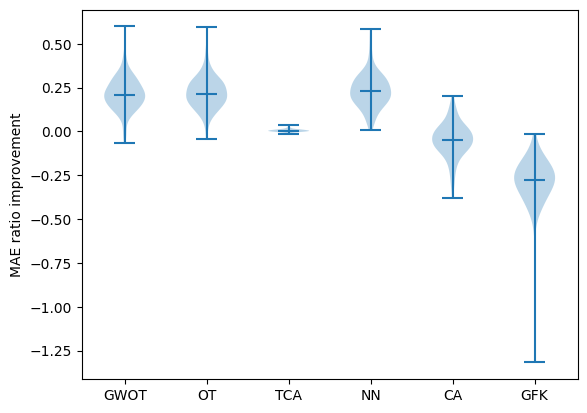

In [12]:
# Overall, for all groups
improve_ratio_combined = []

for group_1 in groups:
    for group_2 in groups:
        if group_1 == group_2:
            continue        
        improve_ratios = ratios_for_metrics(group_name, group_1, group_2, eval_metric, trans_metrics)
        improve_ratio_combined.extend(improve_ratios)

trans_metric_dict = {}
for i in range(len(trans_metrics)):
    trans_metric_dict[trans_metrics[i]] = improve_ratio_combined[i]
print(trans_metric_dict)
data = pd.DataFrame(trans_metric_dict)


# Plot the dataframe
plt.violinplot(data, showmedians=True)
plt.xticks(range(1, len(trans_metrics)+1), labels=trans_metrics)
plt.ylabel(f"{eval_metric} ratio improvement")
fig_path = os.path.join(mimic_output_dir, f"exp4_{group_name}_{eval_metric}.pdf")
plt.savefig(fig_path)
plt.show()

In [13]:
def print_latex(ratios):
    """ 
    Print latex for ratios
    """
    print_str = ""
    for ratio in ratios:
        print_str += f' & {median(ratio)*100:.1f}({stdev(ratio)*100:.1f})'
    print(print_str)
    

In [14]:
for i, group_1 in enumerate(groups):
    for j, group_2 in enumerate(groups):
        if i <= j:
            continue
        print(f"group 1: {group_1}, group_2: {group_2}")
        # mae_improve_ratios = ratios_for_metrics(group_name, group_1, group_2, 'mae', trans_metrics)
        # print_median_std(mae_improve_ratios, trans_metrics, 'MAE')
        rmse_improve_ratios = ratios_for_metrics(group_name, group_1, group_2, eval_metric, trans_metrics)
        print(rmse_improve_ratios)
        print_median_std(rmse_improve_ratios, trans_metrics, eval_metric)
        print_latex(rmse_improve_ratios)

group 1: DIVORCED, group_2: SEPARATED
[[0.30677764033353055, 0.49704712206780377, 0.4154398322397941, 0.17289477713893875, 0.12400084418429462, 0.14913114776539937, 0.42253956567089296, 0.42204941448106836, 0.4199980045484553, 0.3957964267796226, 0.2264443504868544, 0.4505756323883266, 0.18109197907028102, 0.21160464009629576, 0.5116151695225781, 0.41972758995433007, 0.354379422938816, 0.4170685468307972, 0.30317905190209904, 0.25385595618828743, 0.37980096665648033, 0.2718008867953102, 0.3520527774038527, 0.45403821749246737, 0.24966505524534463, 0.4017631716224067, 0.2783951382641066, 0.44931812747745065, 0.4205127372922275, 0.29741934834138417, 0.07516035906101566, 0.18164287702589332, 0.360139380309369, 0.2570599942340411, 0.33987791672080175, 0.13761438483248103, 0.1711077904122475, 0.43070380905395333, 0.24894165626957224, 0.43670950780706047, 0.3465311218370611, 0.35809865395914037, 0.38707358918237145, 0.23127221615226393, 0.3201544648098919, 0.33576903269825426, 0.308031327332